# Homework


#### a) Implement Euler procedure numerically to find y(x) from:
$$ \frac{dy}{dx} = yx^2 -1.2y $$

* the initial condition is: y(0)=1 over the interval [0,2] 
* the range of x is actually the interval [0,2]
* plot the y(x) for h=0.5
* on the same plot compare it with the analytical solution of this differential equation, which is: $$y(x) = e^{x^3/3 -1.2x} $$

HINTS:
- think of the problem in terms of vectors $x$ and $y$.
- in the loop refer to the indices of $x_i$, $y_i$ and the function $f(x_i,y_i)$
- you can use np.arange to define your vector $x$ based on h and range
- you can use np.zeros to initialize $y$, remember to set y[0]=1

https://numpy.org/doc/stable/reference/generated/numpy.arange.html

y=np.zeros(len(x))   
y[0]=1

ASK YOURSELF:

* what if the range changes to [-2,2] and so the initial condition: 
x(0)=-2, y(0)=0.76
* is your code still working?
* can you easily change h?


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(*args):
  x,y = args
  return y*x**2 - 1.2*y

In [3]:
x = np.array([0.0,0.5,1.0,1.5,2.0])
y = np.zeros(len(x))
y[0] = 1
h = 0.5

In [4]:
for i in range(len(x)-1):
    y[i+1] = y[i] + func(x[i],y[i])*h
  
print(y)

[1.       0.4      0.21     0.189    0.288225]


In [5]:
def sol_analitica(x):
  return np.exp((x**3)/3 - 1.2*x)

In [6]:
x2 = np.linspace(0.0,2.0,100)
y2 = sol_analitica(x2)

Text(0.5, 1.0, 'Soluciones a la ecuación diferencial vs x')

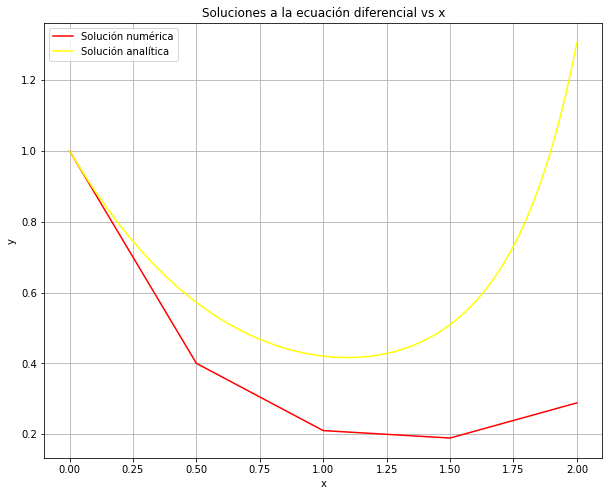

In [7]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(x,y,color='red',label='Solución numérica')
ax.plot(x2,y2,color='yellow',label='Solución analítica')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title('Soluciones a la ecuación diferencial vs x')

**Cambiando las condiciones iniciales y el intervalo:**

In [8]:
def func(*args):
  x,y = args
  return y*x**2 - 1.2*y

In [9]:
x = np.array([-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5,2.0])
y = np.zeros(len(x))
y[0] = 0.76
h = 0.5

In [10]:
for i in range(len(x)-1):
    y[i+1] = y[i] + func(x[i],y[i])*h
  
print(y)

[0.76       1.824      2.7816     2.50344    1.314306   0.5257224
 0.27600426 0.24840383 0.37881585]


In [11]:
def sol_analitica(x):
  return np.exp((x**3)/3 - 1.2*x)

In [12]:
x2 = np.linspace(-2.0,2.0,100)
y2 = sol_analitica(x2)

Text(0.5, 1.0, 'Soluciones a la ecuación diferencial vs x')

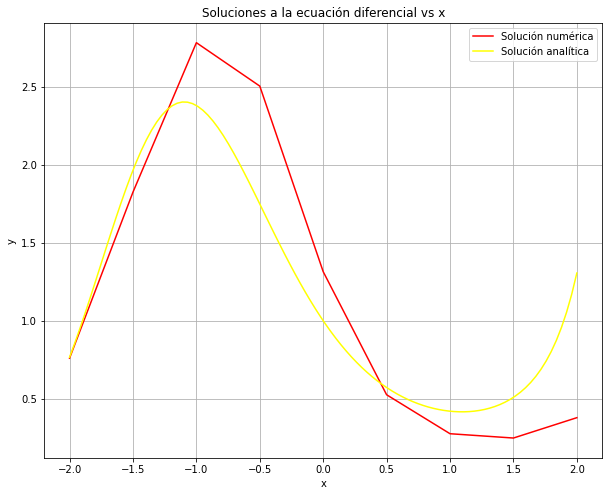

In [13]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(x,y,color='red',label='Solución numérica')
ax.plot(x2,y2,color='yellow',label='Solución analítica')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title('Soluciones a la ecuación diferencial vs x')

#### b) write a function euler_int() that accepts four arguments and returns two

x,y=euler_int(func,intrange,h,yinit)

intrange[0,2]
where func() is:

def func(xi,yi):
    return


and test your code by running the cell below. Compare with the plot below

In [14]:
def euler_int(func,intrange,h,yinit):
  n = int((intrange[-1] - intrange[0])/h + 1)
  x = np.zeros(n)
  y = np.zeros(n)
  x[0] = intrange[0]
  y[0] = yinit
  for i in range(n-1):
    x[i+1] = x[i] + h
    y[i+1] = y[i] + func(x[i],y[i])*h

  return x,y

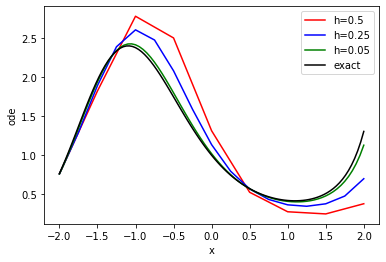

In [15]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)

intrange=[-2.0,2.0]
h=0.5
yinit=0.76
x1,y1=euler_int(func,intrange,h,yinit)
ax.plot(x1,y1,'-r',label='h=0.5')

intrange=[-2.0,2.0]
h=0.25
yinit=0.76
x2,y2=euler_int(func,intrange,h,yinit)
ax.plot(x2,y2,'-b',label='h=0.25')

intrange=[-2.0,2.0]
h=0.05
yinit=0.76
x3,y3=euler_int(func,intrange,h,yinit)
ax.plot(x3,y3,'-g',label='h=0.05')

xexact=np.linspace(intrange[0],intrange[-1],101)
yexact=np.exp((xexact**3)/3-1.2*xexact)
ax.plot(xexact,yexact,'-k',label='exact')

ax.set_xlabel('x')
ax.set_ylabel('ode')
ax.legend()
#plt.show()

# Solve the same differential equation

$$ \frac{dy}{dx} = yx^2 -1.2y $$

with identical initial conditions, but using

* `scipy.integrate.odeint()`
* `scipy.integrate.solve_ivp()`

compare the results

##scipy.integrate.odeint()##

In [16]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [17]:
def derivs(y,x):
  return y*x**2 - 1.2*y

In [18]:
def sol_analitica(x):
  return np.exp((x**3)/3 - 1.2*x)

In [19]:
x2 = np.linspace(-2.0,2.0,100)
y2 = sol_analitica(x2)

In [20]:
xini = -2.0
xfin = 2.0
xodeint = np.linspace(xini,xfin,101)
y0 = 0.76

In [21]:
y_sol = odeint(derivs,y0,xodeint)

Text(0.5, 1.0, 'Soluciones a la EDO vs x')

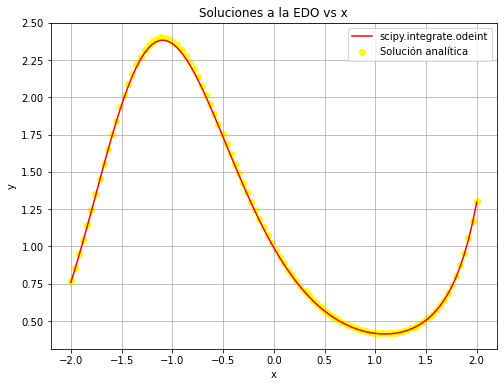

In [22]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(xodeint,y_sol[:,0],color='red',label='scipy.integrate.odeint')
ax.scatter(x2,y2,color='yellow',label='Solución analítica')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title('Soluciones a la EDO vs x')

##scipy.integrate.solve_ivp()

In [23]:
def derivs1(x,y):
  return y*x**2 - 1.2*y

In [24]:
x_span = (-2.0,2.0)
x_eval = np.linspace(-2.0,2.0,101)
y0 = [0.76]

In [25]:
y_sol1 = solve_ivp(derivs1,x_span,y0,t_eval=x_eval)

In [26]:
print(y_sol1.t)
print()
print(y_sol1.y[0])

[-2.   -1.96 -1.92 -1.88 -1.84 -1.8  -1.76 -1.72 -1.68 -1.64 -1.6  -1.56
 -1.52 -1.48 -1.44 -1.4  -1.36 -1.32 -1.28 -1.24 -1.2  -1.16 -1.12 -1.08
 -1.04 -1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6
 -0.56 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12
 -0.08 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36
  0.4   0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84
  0.88  0.92  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32
  1.36  1.4   1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8
  1.84  1.88  1.92  1.96  2.  ]

[0.76       0.84737201 0.93888198 1.03396917 1.13186396 1.23168201
 1.33252585 1.43348481 1.53363509 1.63203972 1.72774855 1.81979829
 1.90721248 1.98901291 2.06438841 2.1327196  2.1934852  2.24625952
 2.2907124  2.32660927 2.35381112 2.3722745  2.38205152 2.38328987
 2.37623279 2.36121909 2.33868315 2.3091549  2.27325985 2.231716
 2.18507605 2.13391885 2.07891903 2.02071651 1.95991

Text(0.5, 1.0, 'Soluciones a la EDO vs x')

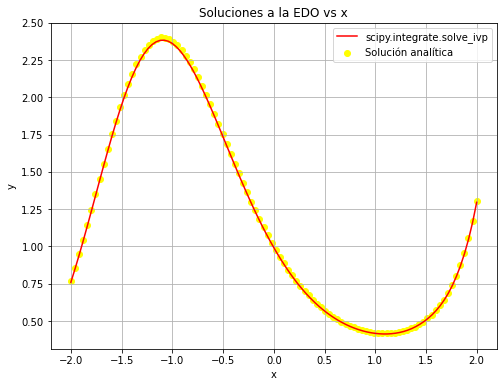

In [27]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(y_sol1.t,y_sol1.y[0],color='red',label='scipy.integrate.solve_ivp')
ax.scatter(x2,y2,color='yellow',label='Solución analítica')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title('Soluciones a la EDO vs x')